C:\Users\Jaimin\AppData\Local\Temp\ipykernel_25188\1974298806.py:109: RuntimeWarning: divide by zero encountered in scalar divide
  mask[u, v] = 1 / (1 + (cutoff / d) ** (2 * order))


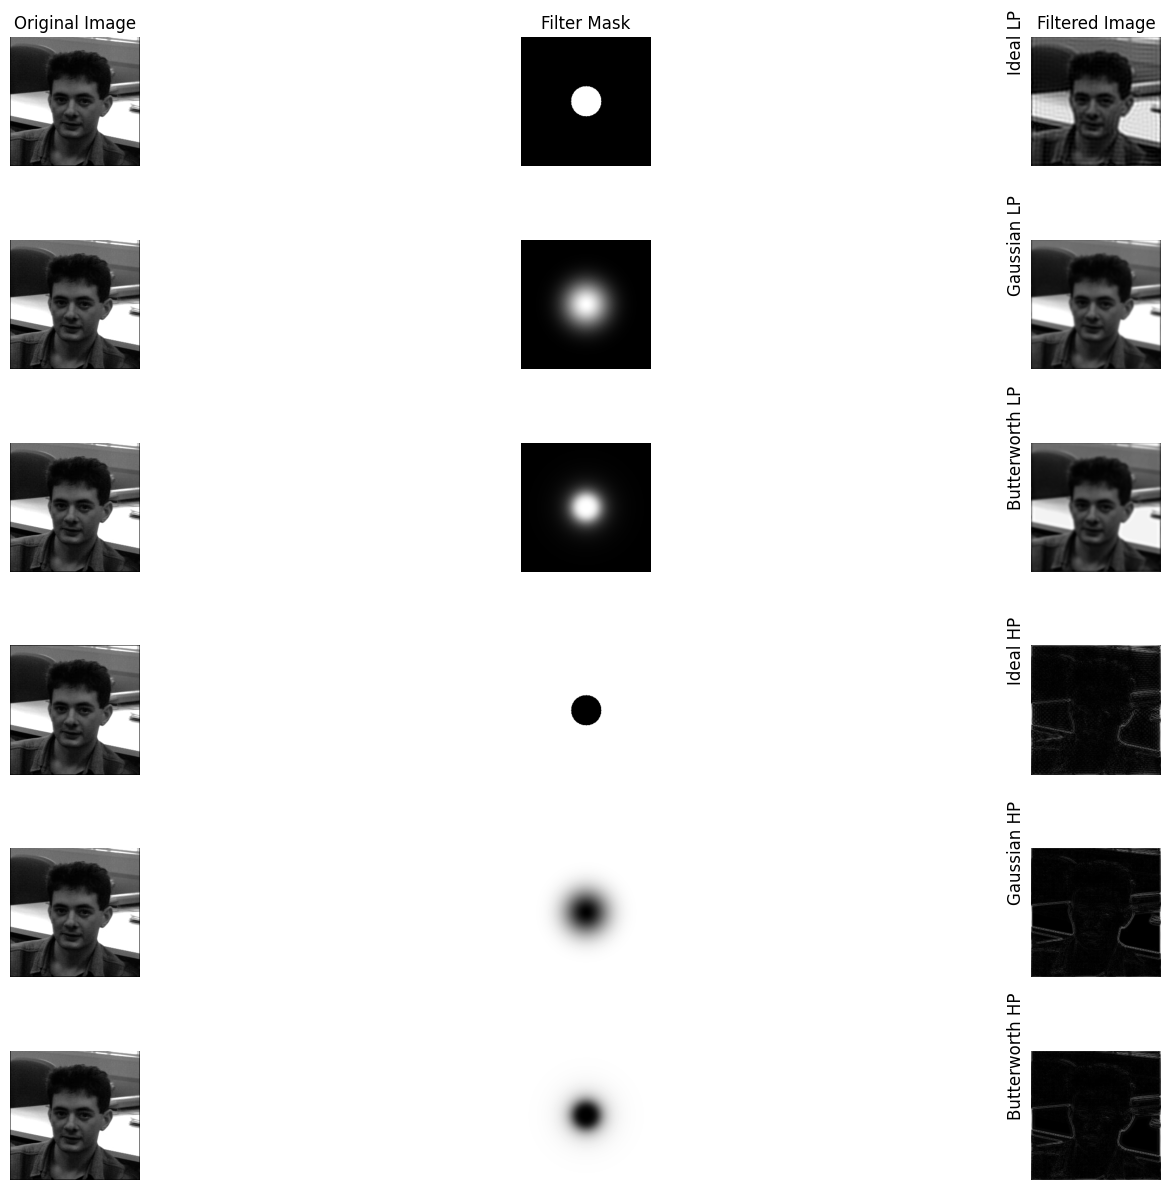

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define Low-Pass Filter Functions
def ideal_low_pass_filter(image, cutoff):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)

    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    for u in range(rows):
        for v in range(cols):
            d = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            if d <= cutoff:
                mask[u, v] = 1

    fshift = dft_shift * mask
    img_back = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(img_back)
    img_back = np.abs(img_back)
    return img_back, mask

def gaussian_low_pass_filter(image, cutoff):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)

    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for u in range(rows):
        for v in range(cols):
            d = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            mask[u, v] = np.exp(-(d ** 2) / (2 * (cutoff ** 2)))

    fshift = dft_shift * mask
    img_back = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(img_back)
    img_back = np.abs(img_back)
    return img_back, mask

def butterworth_low_pass_filter(image, cutoff, order):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)

    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for u in range(rows):
        for v in range(cols):
            d = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            mask[u, v] = 1 / (1 + (d / cutoff) ** (2 * order))

    fshift = dft_shift * mask
    img_back = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(img_back)
    img_back = np.abs(img_back)
    return img_back, mask

# Define High-Pass Filter Functions
def ideal_high_pass_filter(image, cutoff):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)

    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.uint8)
    for u in range(rows):
        for v in range(cols):
            d = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            if d <= cutoff:
                mask[u, v] = 0

    fshift = dft_shift * mask
    img_back = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(img_back)
    img_back = np.abs(img_back)
    return img_back, mask

def gaussian_high_pass_filter(image, cutoff):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)

    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.float32)
    for u in range(rows):
        for v in range(cols):
            d = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            mask[u, v] = 1 - np.exp(-(d ** 2) / (2 * (cutoff ** 2)))

    fshift = dft_shift * mask
    img_back = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(img_back)
    img_back = np.abs(img_back)
    return img_back, mask

def butterworth_high_pass_filter(image, cutoff, order):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)

    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.float32)
    for u in range(rows):
        for v in range(cols):
            d = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            mask[u, v] = 1 / (1 + (cutoff / d) ** (2 * order))

    fshift = dft_shift * mask
    img_back = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(img_back)
    img_back = np.abs(img_back)
    return img_back, mask

# Display Results Function
def display_full_results(image, 
                         ideal_low, ideal_low_mask, 
                         gauss_low, gauss_low_mask, 
                         butter_low, butter_low_mask, 
                         ideal_high, ideal_high_mask, 
                         gauss_high, gauss_high_mask, 
                         butter_high, butter_high_mask):
    plt.figure(figsize=(18, 12))
    filters = [
        ("Ideal LP", ideal_low_mask, ideal_low),
        ("Gaussian LP", gauss_low_mask, gauss_low),
        ("Butterworth LP", butter_low_mask, butter_low),
        ("Ideal HP", ideal_high_mask, ideal_high),
        ("Gaussian HP", gauss_high_mask, gauss_high),
        ("Butterworth HP", butter_high_mask, butter_high),
    ]

    for i, (title, mask, filtered) in enumerate(filters):
        row = i + 1

        # Original Image
        plt.subplot(len(filters), 3, (row - 1) * 3 + 1)
        if row == 1:
            plt.title("Original Image")
        plt.imshow(image, cmap='gray')
        plt.axis('off')

        # Filter Mask
        plt.subplot(len(filters), 3, (row - 1) * 3 + 2)
        if row == 1:
            plt.title("Filter Mask")
        plt.imshow(mask, cmap='gray')
        plt.axis('off')

        # Filtered Image
        plt.subplot(len(filters), 3, (row - 1) * 3 + 3)
        if row == 1:
            plt.title("Filtered Image")
        plt.imshow(filtered, cmap='gray')
        plt.axis('off')

        plt.text(-50, 10, title, va='center', rotation=90, fontsize=12)

    plt.tight_layout()
    plt.show()


# Load the image and apply filters
image = cv2.imread('download.jpg', cv2.IMREAD_GRAYSCALE)
cutoff_frequency = 30
order = 2

# Low-Pass Filters
ideal_low, ideal_low_mask = ideal_low_pass_filter(image, cutoff_frequency)
gauss_low, gauss_low_mask = gaussian_low_pass_filter(image, cutoff_frequency)
butter_low, butter_low_mask = butterworth_low_pass_filter(image, cutoff_frequency, order)

# High-Pass Filters
ideal_high, ideal_high_mask = ideal_high_pass_filter(image, cutoff_frequency)
gauss_high, gauss_high_mask = gaussian_high_pass_filter(image, cutoff_frequency)
butter_high, butter_high_mask = butterworth_high_pass_filter(image, cutoff_frequency, order)

# Display Results
display_full_results(image, ideal_low, ideal_low_mask, gauss_low, gauss_low_mask,
                     butter_low, butter_low_mask, ideal_high, ideal_high_mask,
                     gauss_high, gauss_high_mask, butter_high, butter_high_mask)
